In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The GSI's Defense ##

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section').show()

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
observed_average = 13.6667 

In [6]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
11,0
5,9
9,25
9,4
9,17
6,9
9,23
4,0
12,17
9,16


In [7]:
np.average(random_sample.column('Midterm'))

13.888888888888889

In [8]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [9]:
random_sample_midterm_avg()

15.074074074074074

In [10]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

## Our Decision

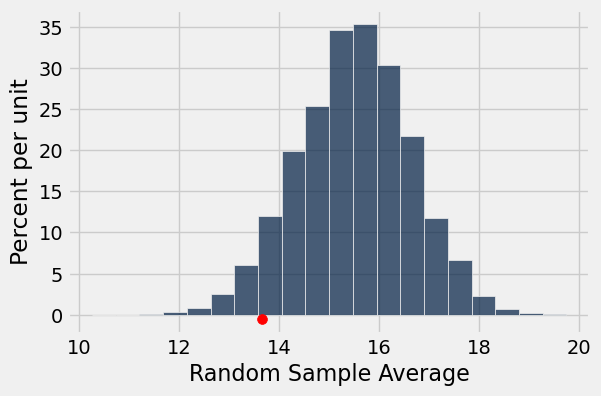

In [11]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, -0.005, color='red', s=50);

### Approach 1

In [12]:
averages_tbl

Random Sample Average
14.4074
17.7407
15.5926
15.1111
15.0741
15.3333
15.1852
13.8519
15.5556
15.6296


In [13]:
# (1) Calculate the p-value: simulation area beyond observed value

sum(averages_tbl.column(0) <= observed_average) / 50000









#np.count_nonzero(sample_averages <= observed_average) / 50000
#sum(sample_averages <= observed_average) / 50000
# (2) See if this is less than 5%

0.05688

### Approach 2

In [14]:
# (1) Find simulated value corresponding to 5% of 50,000









five_percent_point = averages_tbl.sort(0).column(0).item(int(50000*0.05))
five_percent_point

13.62962962962963

In [15]:
# (2) See if this value is greater than observed value
observed_average

13.6667

### Visual Representation

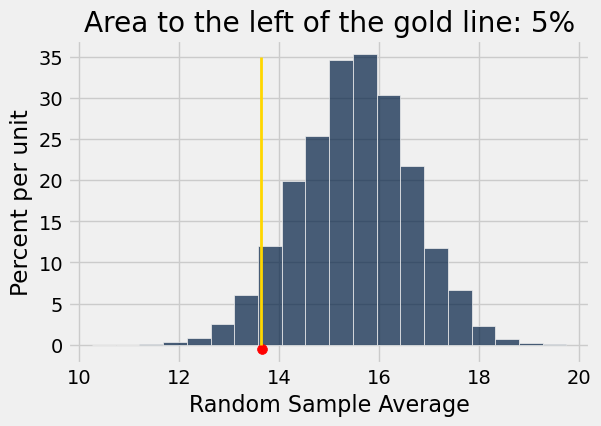

In [16]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.scatter(observed_average, -0.005, color='red', s=50);